## NFL Fantasy Rookie Project Part 2 - Running Backs

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
final_rb = pd.read_csv('C:/Users/kevin/Downloads/Full Rushing Model 2017-2022.csv')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [9]:
final_rb.columns

Index(['Player', 'Team', 'Year', 'Height', 'Weight', '40 Time', 'Pick',
       'Teammate', 'Teammate Year', 'Tm_x', 'Age_x', 'Pos_x', 'G_x', 'GS_x',
       'Rush_Att', 'Rush_Yds', 'Rush_TD', 'Rush_1D', 'Rush_Lng', 'Rush_Y/A',
       'Rush_Y/G', 'Teammate Tm', 'Teammate Age', 'Teammate Pos', 'Teammate G',
       'Teammate GS', 'Teammate Rush_Att', 'Teammate Rush_Yds',
       'Teammate Rush_TD', 'Teammate Rush_1D', 'Teammate Rush_Lng',
       'Teammate Rush_Y/A', 'Teammate Rush_Y/G', 'Teammate Rush_Fmb', 'Tgt',
       'Rec', 'Yds', 'Y/R', 'TD', '1D', 'Lng', 'Y/Tgt', 'R/G', 'Y/G',
       'Fumbles', 'Total FP', 'FPPG'],
      dtype='object')

### Linear Regression

Like previously mentioned, the rookie's stats themselves are not included in the predictors. The rookie's stats are end of year stats, so it would not be something we have when we want to project future rookies' stats and fantasy points. The teammate stats are relevant because it is the teammate's stats from the PREVIOUS year.

In [56]:
predictors = ['Height', 'Weight', '40 Time', 'Pick', 'Age_x', 'Teammate Age', 'Teammate G',
              'Teammate Rush_Att', 'Teammate Rush_Yds',
           'Teammate Rush_TD', 'Teammate Rush_1D', 'Teammate Rush_Lng',
           'Teammate Rush_Y/A', 'Teammate Rush_Y/G', 'Teammate Rush_Fmb']

target = ['FPPG']

In [57]:
train = final_rb[final_rb["Year"].isin([2018, 2019, 2020, 2021])]
test = final_rb[final_rb["Year"] == 2022]

In [58]:
lm = LinearRegression()

In [59]:
lm.fit(train[predictors],train[target])

LinearRegression()

In [60]:
predictions = lm.predict(test[predictors])
predictions = pd.DataFrame(predictions, columns=["predictions"], index=test.index)
combination = pd.concat([test[["Player", "Year", "FPPG"]], predictions], axis=1)

In [21]:
from sklearn import metrics

In [61]:
print('MAE:', metrics.mean_absolute_error(combination["FPPG"], combination["predictions"]))
print('MSE:', metrics.mean_squared_error(combination["FPPG"], combination["predictions"]))
print('RMSE:', np.sqrt(metrics.mean_squared_error(combination["FPPG"], combination["predictions"])))
print('R-squared: ', metrics.explained_variance_score(combination["FPPG"], combination["predictions"]))
print('R: ', np.sqrt(metrics.explained_variance_score(combination["FPPG"], combination["predictions"])))

MAE: 3.426755510522917
MSE: 15.817491180150471
RMSE: 3.977120966245617
R-squared:  0.4081383974203784
R:  0.6388571025044477


I tried both a regular linear regression and a ridge regression and saw more success with just a regular linear regression.

In [62]:
combination.sort_values(by='predictions', ascending=False).head(10)

,Player,Year,FPPG,predictions
23,Dameon Pierce,2022,11.876923,10.521589
17,Breece Hall,2022,16.157143,10.185390
18,Kenneth Walker III,2022,13.500000,7.322166
21,Tyrion Davis-Price,2022,1.650000,6.623739
19,James Cook,2022,6.481250,6.458575
27,Hassan Haskins,2022,1.733333,5.548370
22,Brian Robinson,2022,9.060000,5.255208
28,Tyler Allgeier,2022,9.837500,4.426420
20,Rachaad White,2022,7.829412,4.175850
29,Jerome Ford,2022,0.092308,4.031686


This first model here has 2022 as the test set so I have data to compare to. My projections had Pierce, Hall, and Walker as the projected top 3 at the position and that is indeed how it worked out. That along with the R score of 0.64 means this model is relatively strong.

In [66]:
# Get the coefficients and corresponding feature names
lm_coefs = lm.coef_.ravel()
feature_names = train[predictors].columns.tolist()  # Convert DataFrame to a list of column names

# Create a DataFrame to store the coefficients and feature names
coefs_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': lm_coefs})

# Sort the DataFrame by absolute coefficient values
coefs_df['Absolute Coefficient'] = coefs_df['Coefficient'].abs()
coefs_df = coefs_df.sort_values('Absolute Coefficient', ascending=False).reset_index(drop=True)

# Print the feature importance
print(coefs_df)

              Feature  Coefficient  Absolute Coefficient
0             40 Time    -6.029638              6.029638
1   Teammate Rush_Y/A    -2.281542              2.281542
2          Teammate G     0.756736              0.756736
3               Age_x    -0.419973              0.419973
4    Teammate Rush_TD    -0.363365              0.363365
5              Height    -0.310611              0.310611
6   Teammate Rush_Fmb     0.179234              0.179234
7   Teammate Rush_Y/G     0.137900              0.137900
8    Teammate Rush_1D     0.091851              0.091851
9              Weight     0.068248              0.068248
10  Teammate Rush_Att    -0.058196              0.058196
11  Teammate Rush_Lng     0.049641              0.049641
12               Pick    -0.036003              0.036003
13       Teammate Age     0.008523              0.008523
14  Teammate Rush_Yds    -0.003699              0.003699


In [69]:
import statsmodels.api as sm
results = sm.OLS(train[target],train[predictors]).fit()
p_value = results.pvalues[predictors]
p_value.sort_values()

Pick                 0.000029
Teammate G           0.060427
Teammate Rush_Y/A    0.100812
Teammate Rush_TD     0.133538
Teammate Rush_Att    0.164661
Teammate Rush_Y/G    0.188109
Teammate Rush_Lng    0.318568
Teammate Rush_1D     0.453400
Weight               0.641422
Teammate Rush_Fmb    0.672624
Height               0.696957
Teammate Rush_Yds    0.742363
Age_x                0.755911
Teammate Age         0.932080
40 Time              0.932794
dtype: float64

In [46]:
predictors = ['Height', 'Weight', '40 Time', 'Pick', 'Age_x', 'Teammate Age', 'Teammate G',
              'Teammate Rush_Att', 'Teammate Rush_Yds',
           'Teammate Rush_TD', 'Teammate Rush_1D', 'Teammate Rush_Lng',
           'Teammate Rush_Y/A', 'Teammate Rush_Y/G', 'Teammate Rush_Fmb']

target = ['Total FP']

In [47]:
train = final_rb[final_rb["Year"].isin([2018, 2019, 2020, 2021])]
test = final_rb[final_rb["Year"] == 2022]

In [48]:
lm = LinearRegression()

In [49]:
lm.fit(train[predictors],train[target])

LinearRegression()

In [51]:
predictions = lm.predict(test[predictors])
predictions = pd.DataFrame(predictions, columns=["predictions"], index=test.index)
combination = pd.concat([test[["Player", "Year", "Total FP"]], predictions], axis=1)

In [53]:
print('MAE:', metrics.mean_absolute_error(combination["Total FP"], combination["predictions"]))
print('MSE:', metrics.mean_squared_error(combination["Total FP"], combination["predictions"]))
print('RMSE:', np.sqrt(metrics.mean_squared_error(combination["Total FP"], combination["predictions"])))
print('R-squared: ', metrics.explained_variance_score(combination["Total FP"], combination["predictions"]))
print('R: ', np.sqrt(metrics.explained_variance_score(combination["Total FP"], combination["predictions"])))

MAE: 48.73386074025879
MSE: 3522.7306673274265
RMSE: 59.352596129633845
R-squared:  0.17549026441229987
R:  0.4189155814866521


In [54]:
combination.sort_values(by='predictions', ascending=False).head(10)

,Player,Year,Total FP,predictions
23,Dameon Pierce,2022,154.4,152.302023
17,Breece Hall,2022,113.1,146.887335
18,Kenneth Walker III,2022,202.5,98.620536
21,Tyrion Davis-Price,2022,9.9,96.403851
27,Hassan Haskins,2022,26.0,95.941198
19,James Cook,2022,103.7,94.399055
22,Brian Robinson,2022,108.7,86.131572
20,Rachaad White,2022,133.1,55.644743
28,Tyler Allgeier,2022,157.4,54.412701
29,Jerome Ford,2022,1.2,53.404312


The model on points per game is much better. This is because for rookies, some guys may not play a big role until later in the season or they may miss a lot of games. This will lower their total points even though they were actually pretty good for fantasy when you were able to play them. Case in point: Breece Hall.

### Projecting the 2023 Rookies

In [73]:
predictors = ['Height', 'Weight', '40 Time', 'Pick', 'Age_x', 'Teammate Age', 'Teammate G',
              'Teammate Rush_Att', 'Teammate Rush_Yds',
           'Teammate Rush_TD', 'Teammate Rush_1D', 'Teammate Rush_Lng',
           'Teammate Rush_Y/A', 'Teammate Rush_Y/G', 'Teammate Rush_Fmb']

target = ['FPPG']

In [74]:
train = final_rb[final_rb["Year"].isin([2018, 2019, 2020, 2021, 2022])]
test = final_rb[final_rb["Year"] == 2023]

In [75]:
lm = LinearRegression()

In [76]:
lm.fit(train[predictors],train[target])

LinearRegression()

In [77]:
predictions = lm.predict(test[predictors])
predictions = pd.DataFrame(predictions, columns=["predictions"], index=test.index)
combination = pd.concat([test[["Player", "Year"]], predictions], axis=1)

After re running the model with 2022 included as the training set, the projections for the 2023 rookies are below. Robinson and Gibbs at the top makes sense because they were high first round picks and their current ADP in fantasy is much higher than the rest. Devon Achane is a sleeper that I will be looking at following the conclusion of this model.

In [78]:
combination.sort_values(by='predictions', ascending=False).head(15)

,Player,Year,predictions
0,Bijan Robinson,2023,10.250899
1,Jahmyr Gibbs,2023,9.373282
5,Devon Achane,2023,8.096718
6,Tank Bigsby,2023,7.004942
3,Kendre Miller,2023,6.903701
2,Zach Charbonnet,2023,6.595700
14,DeWayne McBride,2023,5.114798
7,Roschon Johnson,2023,4.570349
8,Israel Abanikanda,2023,4.213827
11,Chris Rodriguez Jr.,2023,3.264604


The pick someone was drafted is so overwhelmingly important to a running back's results. Additionally, teammate performance is next most important. The talent of the running back himself (height, weight, 40 time) is seemingly not important compared to outside factors.

In [79]:
results = sm.OLS(train[target],train[predictors]).fit()
p_value = results.pvalues[predictors]
p_value.sort_values()

Pick                 0.000006
Teammate G           0.040368
Teammate Rush_Y/A    0.109989
Teammate Rush_TD     0.117403
Teammate Rush_Att    0.137379
Teammate Rush_Y/G    0.290014
Teammate Rush_Lng    0.496222
Height               0.536900
Weight               0.663800
Age_x                0.687938
Teammate Rush_Fmb    0.780952
Teammate Age         0.796046
Teammate Rush_Yds    0.796327
Teammate Rush_1D     0.911236
40 Time              0.919106
dtype: float64

In [4]:
final_rb.columns

Index(['Unnamed: 0', 'Player', 'Team', 'Year', 'Height', 'Weight', '40 Time',
       'Pick', 'Teammate', 'Teammate Year', 'Tm_x', 'Age_x', 'Pos_x', 'G_x',
       'GS_x', 'Rush_Att', 'Rush_Yds', 'Rush_TD', 'Rush_1D', 'Rush_Lng',
       'Rush_Y/A', 'Rush_Y/G', 'Teammate Tm', 'Teammate Age', 'Teammate Pos',
       'Teammate G', 'Teammate GS', 'Teammate Rush_Att', 'Teammate Rush_Yds',
       'Teammate Rush_TD', 'Teammate Rush_1D', 'Teammate Rush_Lng',
       'Teammate Rush_Y/A', 'Teammate Rush_Y/G', 'Teammate Rush_Fmb', 'Tgt',
       'Rec', 'Yds', 'Y/R', 'TD', '1D', 'Lng', 'Y/Tgt', 'R/G', 'Y/G',
       'Fumbles', 'Total FP', 'FPPG'],
      dtype='object')

### Support Vector Machines

In [18]:
def add_target_column(final_rb):
    # Sort the dataframe by 'FPPG' column in descending order within each 'Year' group
    final_rb_sorted = final_rb.groupby('Year', group_keys=False).apply(lambda x: x.nlargest(5, 'FPPG'))
    
    # Create the 'Target' column and set it to 1 for the top 5 rows, and 0 for the rest
    final_rb_sorted['Target'] = 1
    final_rb_sorted['Target'] = final_rb_sorted['Target'].fillna(0).astype(int)
    
    # Merge the sorted and updated dataframe back with the original dataframe
    final_rb = final_rb.merge(final_rb_sorted[['Year', 'Player', 'Target']], on=['Year', 'Player'], how='left')
    
    return final_rb

# Usage example:
# Assuming 'final_rb' is your original dataframe
new_rb = add_target_column(final_rb)

In [28]:
new_rb = new_rb.fillna(0)

In [20]:
predictors = ['Height', 'Weight', '40 Time', 'Pick', 'Age_x', 'Teammate Age', 'Teammate G',
              'Teammate Rush_Att', 'Teammate Rush_Yds',
           'Teammate Rush_TD', 'Teammate Rush_1D', 'Teammate Rush_Lng',
           'Teammate Rush_Y/A', 'Teammate Rush_Y/G', 'Teammate Rush_Fmb']

target = ['Target']

The above code basically states that if a running back finished top 5 in fantasy points per game amongst rookies in his year, the target value is 1. Otherwise, it is 0.

In [29]:
train = new_rb[new_rb["Year"].isin([2018, 2019, 2020, 2021])]
test = new_rb[new_rb["Year"] == 2022]

In [30]:
from sklearn.svm import SVC
model = SVC()
model.fit(train[predictors], train[target])

C:\Users\kevin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [31]:
predictions = model.predict(test[predictors])

In [32]:
from sklearn.metrics import classification_report,confusion_matrix

The model always selects the target as 0 when predicting. This model is useless.

In [33]:
print(confusion_matrix(test[target],predictions))
print(classification_report(test[target],predictions))

[[16  0]
 [ 5  0]]
              precision    recall  f1-score   support

         0.0       0.76      1.00      0.86        16
         1.0       0.00      0.00      0.00         5

    accuracy                           0.76        21
   macro avg       0.38      0.50      0.43        21
weighted avg       0.58      0.76      0.66        21



C:\Users\kevin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [ ]:
grid.fit(train[predictors], train[target])

In [39]:
grid.best_params_

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

In [40]:
grid.best_estimator_

SVC(C=10, gamma=0.0001)

In [41]:
grid_predictions = grid.predict(test[predictors])

Even after testing many models, the model only recalls 1 in 5 of correct answers for running backs that finish in the top 5 for the year.

In [42]:
print(confusion_matrix(test[target],grid_predictions))
print(classification_report(test[target],grid_predictions))

[[13  3]
 [ 4  1]]
              precision    recall  f1-score   support

         0.0       0.76      0.81      0.79        16
         1.0       0.25      0.20      0.22         5

    accuracy                           0.67        21
   macro avg       0.51      0.51      0.51        21
weighted avg       0.64      0.67      0.65        21



Even the best parameters for a Support Vector Maachine only correctly predicted 1 out of 5 of the top RB rookie finishes in 2022. SVM is not a model we need to continue looking at for the WRs in part 3.

### K Means Clustering

This function creates a new data set with only the top 5 running backs for each year. We will attempt to perform cluster analysis to see if we can spot trends in the rookies that succeed.

In [13]:
def yearly_outperformers(df, group):
    # Grouping the DataFrame by 'Year'
    groups = df.groupby(group)

    # Sorting the groups based on 'WS/48_diff' column and retrieving the top 15 results
    top_results = groups.apply(lambda x: x.sort_values('FPPG', ascending=False).head(5))

    # Resetting the index of the DataFrame
    top_results = top_results.reset_index(drop=True)

    return top_results

In [14]:
temp = yearly_outperformers(final_rb, 'Year')
top_rbs = temp[temp["Year"].isin([2018, 2019, 2020, 2021, 2022])]

In [16]:
top_rbs = top_rbs.drop('Unnamed: 0', axis=1)

In [17]:
top_rbs.to_csv('C:/Users/kevin/Downloads/Top 5 RBs 2018-2022.csv', index = False)

In [44]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [49]:
predictors = ['Height', 'Weight', '40 Time', 'Pick', 'Age_x', 'Teammate Age', 'Teammate G',
              'Teammate Rush_Att', 'Teammate Rush_Yds',
           'Teammate Rush_TD', 'Teammate Rush_1D', 'Teammate Rush_Lng',
           'Teammate Rush_Y/A', 'Teammate Rush_Y/G', 'Teammate Rush_Fmb']

target = ['FPPG']

In [60]:
train = top_rbs[top_rbs["Year"].isin([2018, 2019, 2020, 2021, 2022])]

In [ ]:
silhouette = []

for n_clusters in range(2, 20):
    kmeans = KMeans(n_clusters=n_clusters, random_state=99)
    cluster_labels = kmeans.fit_predict(train[predictors])
    
    centers = kmeans.cluster_centers_
    
    score = silhouette_score(train[predictors], cluster_labels)
    silhouette.append(score)
    print('For n_clusters = {}, silhouette score is {}'.format(n_clusters, score))

Text(0.5, 0.98, 'Identifying Optimal Cluster #')

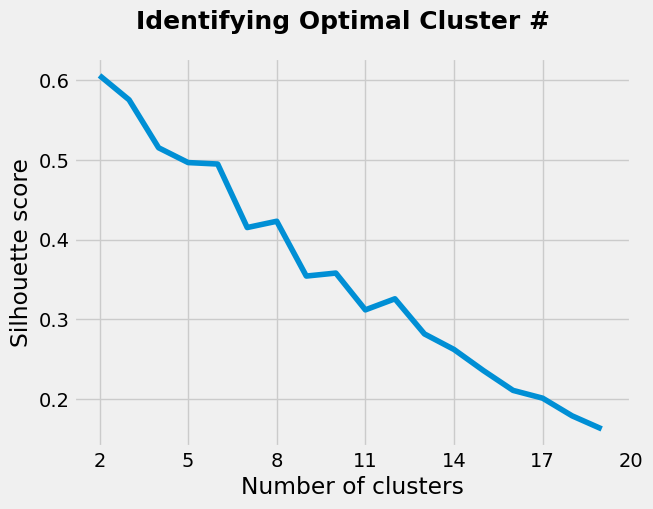

In [62]:
plt.style.use('fivethirtyeight')

silhouette_fig, ax = plt.subplots()

ax.plot(range(2,20), silhouette)

ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette score')

ax.set_xticks(np.arange(2,21, 3.0))

silhouette_fig.suptitle('Identifying Optimal Cluster #', weight = 'bold', size = 18)

2 or 3 clusters is best.

In [65]:
kmeans = KMeans(n_clusters = 5, random_state = 1)
kmeans.fit(train[predictors])

y_kmeans = kmeans.predict(train[predictors])

C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [66]:
df_cluster = pd.DataFrame()

df_cluster['Player'] = train['Player']
df_cluster['Cluster'] = y_kmeans
df_cluster.sort_values(by='Cluster')

,Player,Cluster
11,Miles Sanders,0
22,Javonte Williams,0
16,D'Andre Swift,0
29,Tyler Badie,1
27,Dameon Pierce,1
7,Nick Chubb,1
8,Sony Michel,1
23,Michael Carter,1
15,Jonathan Taylor,1
21,Elijah Mitchell,1


2 clusters had the highest silhouette score but there was no insight there. Here with 5 clusters, there are a few noticeable breakdowns: Cluster 0 seems to be quick, explosive backs with good draft capital (all second rounders). CLuster 1 is bruising, rushing focused guys who had large carrying responsibility early. Cluster 2 is guys with decent draft capital who are strong pass catchers (with exception to Allgeier and Dobbins). Cluster 3 does not have a noticeable trend beyond the fact that three of the players are first round picks (Montgomery and Hines are probably miscast in this cluster). Tony Pollard seems to be an exception no matter how many clusters I run.